# Fortune 2000 Global Companies Analysis

### Project Overview
This project aims to perform a comprehensive analysis of the Forbes 2000 list for the year 2022, with the primary goal of comparing the 2022 data against previous years. The analysis will explore trends and shifts in company rankings and financial performance over time. The Forbes 2000 list ranks the top 2000 global companies based on a variety of financial indicators. Through this analysis, we seek to offer valuable insights into the changing dynamics of the world’s leading businesses.

Visualizations include:

Visualization 1: Companies with higher rankings on the Forbes 2000 list generally exhibit greater revenue, profits, and assets.

Visualization 2: Older companies tend to achieve higher rankings on the Forbes 2000 list.

Visualization 3: The profit growth of oil and gas companies has slowed over time, likely due to increasing public concern over fossil fuel consumption.

Visualization 4: The Forbes 2000 list shows a clear and significant rise in the representation and ranking of technology companies, driven by technological advancements and innovations, especially from 2010 onward.

## Data Sources : 

1. Fortune 2000 list for the year 2022 : https://www.kaggle.com/datasets/rakkesharv/forbes-2000-global-companies/data?select=Forbes_2000_top_company_CLNQ11.csv
2. Fortune 2000 list for the years (2008-2021) :  https://data.world/aroissues/forbes-global-2000-2008-2019
3. GDP by country : https://www.kaggle.com/code/alejopaullier/gdp-by-country-1999-2022/input?select=GDP+by+Country+1999-2022.csv

# Importing necessary libraries

In [74]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import re
pd.set_option('mode.chained_assignment', None)
import glob

# loading the dataset

In [75]:
# Contains List of Fortune 2000 companies for the year 2022 
data = pd.read_csv("data/Forbes Global 2000 - 2022.csv")

# Contains the GDP of countries
gdp = pd.read_csv("data/GDP by Country 1999-2022.csv")

In [76]:
# This code will convert .xlsx files to .csv files
# uncomment these lines, if dowloaded as .xlsx files

"""strings = "data\*"
for name in glob.glob(strings):
    df = pd.read_excel(name)
    df.to_csv(name.replace(".xlsx", ".csv"))"""


'strings = "data\\*"\nfor name in glob.glob(strings):\n    df = pd.read_excel(name)\n    df.to_csv(name.replace(".xlsx", ".csv"))'

In [77]:
# Inspecting the dataset
data.head()

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621


In [78]:
gdp.head()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534


# Cleaning and organizing Data

In [79]:
## Total number of employees sometimes has variable have "[" at the end

data["Total Employees"] = data["Total Employees"].apply(lambda x : re.sub(r"\]", "", x))

Note : Row 1470 of "Forbes GLobal 2000 - 2021" contains inconsistent data, I have replaced that with (1470, Coinbase, IT Software & Services, United states, 1300, 322, 5900, 68100. for values (Rank, Company, Industry, Sales, Profits, Assets, Market_Value) respectively.


#### Combining the datasets of different years from 2008 to 2022 into a single dataset, by adhering to the tidy data principles

In [80]:
## printing all the files present
for name in glob.glob('data/*'): 
    print(name)

data\Forbes Global 2000 - 2008.csv
data\Forbes Global 2000 - 2009.csv
data\Forbes Global 2000 - 2010.csv
data\Forbes Global 2000 - 2011.csv
data\Forbes Global 2000 - 2012.csv
data\Forbes Global 2000 - 2013.csv
data\Forbes Global 2000 - 2014.csv
data\Forbes Global 2000 - 2015.csv
data\Forbes Global 2000 - 2016.csv
data\Forbes Global 2000 - 2017.csv
data\Forbes Global 2000 - 2018.csv
data\Forbes Global 2000 - 2019.csv
data\Forbes Global 2000 - 2020.csv
data\Forbes Global 2000 - 2021.csv
data\Forbes Global 2000 - 2022.csv
data\GDP by Country 1999-2022.csv


In [81]:
# Inspecting the forbes 2008 dataset
df_2008 = pd.read_csv("data\Forbes Global 2000 - 2008.csv", index_col = 0)
df_2008.dtypes

Rank_nr           int64
Company          object
Industry         object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market_Value    float64
dtype: object

#### To distinguish this dataset from others, let's include a column named 'Year'

In [82]:
data["Year"] = 2022

In [83]:
data.dtypes

2022 Ranking                 int64
Organization Name           object
Industry                    object
Country                     object
Year Founded                 int64
CEO                         object
Revenue (Billions)         float64
Profits (Billions)         float64
Assets (Billions)          float64
Market Value (Billions)    float64
Total Employees             object
Year                         int64
dtype: object

We can observe that columns at in the datasets from 2008-2021 have fewer columns and column names are different, lets rename columns consistently and merege the csv files, and also the Units used are different.

#### Lets arrange the names of the columns for consistency

In [84]:
data.rename(columns={'2022 Ranking':'Rank_nr','Organization Name': 'Company', 'Revenue (Billions)': 'Sales', 'Profits (Billions)':'Profits', 'Assets (Billions)' : 'Assets', 'Market Value (Billions)':'Market_Value'}, inplace=True)
data.head()

,Rank_nr,Company,Industry,Country,Year Founded,CEO,Sales,Profits,Assets,Market_Value,Total Employees,Year
0,1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,2022
1,2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,2022
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0,2022
3,4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,2022
4,5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,2022


In [85]:
# This function retrieves the year from file name.
def get_year_of_file(filename):

    # Define the regular expression
    pattern = re.compile(r"(\d{4})\.csv$")
    
    # Use search to find the match in the filename
    match = pattern.search(filename)
    
    # Check if a match is found
    if match:
        # Extract the year from the matched group
        return match.group(1)
        
    else:
        print("No year found in the filename.")

In [86]:

# This function combines the datasets
def combine_datasets(data_2022):
    
    # Added a column named 'Year,' which, along with the ranking, can serve as the primary key for the dataset.
    data = pd.DataFrame()

    # Iterating through all the files
    for filename in glob.glob("data\*"):

        # Loading the dataset
        df = pd.read_csv(filename, index_col = 0)
        
        try:
            # Retrieving the year name from the function and broadcasting it across all columns.
            df["Year"] = int(get_year_of_file(filename))
        except TypeError as e:
            print("get_year_of_file method is not returning year, instead returning None")
            
        if int(get_year_of_file(filename)) != 2022:
            
            df["Rank_nr"] = df["Rank_nr"].map(lambda x : int(x))
            
            # converting the sales in millions of dollars to Billions
            df["Sales"] = df["Sales"].map(lambda x : x/1000)
            df["Profits"] = df["Profits"].map(lambda x : x/1000)
            df["Assets"] = df["Assets"].map(lambda x : x/1000)
            df["Market_Value"] = df["Market_Value"].map(lambda x : x/1000)
            
            if not data.empty: 
                data = pd.merge(data, df, on=["Rank_nr", "Company", 'Industry', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value', 'Year'], how='outer')
            else:
                data = df
            
    # Merging the 2022 dataset with data from 2008 to 2021
    data = pd.merge(data, data_2022, on=["Rank_nr", "Company", 'Industry', 'Country', 'Sales', 'Profits', 'Assets', 'Market_Value', 'Year'], how='outer')
        
    return data

In [87]:
# calling the merge dataset function
data = combine_datasets(data)
data

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year,Year Founded,CEO,Total Employees
0,1,HSBC Holdings,Banking,United Kingdom,146.50,19.13,2348.98,180.81,2008,NaN,NaN,NaN
1,2,General Electric,Conglomerates,United States,172.74,22.21,795.34,330.93,2008,NaN,NaN,NaN
2,3,Bank of America,Banking,United States,119.19,14.98,1715.75,176.53,2008,NaN,NaN,NaN
3,4,JPMorgan Chase,Banking,United States,116.35,15.37,1562.15,136.88,2008,NaN,NaN,NaN
4,5,ExxonMobil,Oil & Gas Operations,United States,358.60,40.61,242.08,465.51,2008,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29987,1995,Aperam,Materials,Luxembourg,6.03,1.14,6.72,3.16,2022,2010.0,Timoteo di Maulo,0
29988,1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,0.04,1.41,0.17,1.14,2022,1998.0,Shan Min Huang,306.0
29989,1997,NMDC,Materials,India,3.52,1.41,5.72,6.40,2022,1958.0,Sumit Deb,16944.0
29990,1997,Sichuan Changhong Electric,Consumer Durables,China,15.72,0.05,12.10,1.96,2022,1988.0,Wei Li,51841.0


In [88]:
data.sample(10)

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year,Year Founded,CEO,Total Employees
5443,1444,China Intl Marine Container,Capital Goods,China,6.940,0.2100,5.010,4.700,2010,NaN,NaN,NaN
6465,466,Suncorp-Metway,Diversified Financials,Australia,12.486,0.6555,80.443,10.554,2011,NaN,NaN,NaN
2185,186,Walgreen,Retailing,United States,59.950,2.1100,24.510,23.540,2009,NaN,NaN,NaN
20631,639,PPL,Utilities,United States,7.622,1.1750,42.388,19.448,2018,NaN,NaN,NaN
25473,1481,Weatherford International,Oil & Gas Operations,United States,5.215,3.6350,7.293,0.315,2020,NaN,NaN,NaN
11286,1290,Wärtsilä,Capital Goods,Finland,6.234,0.4472,6.505,9.200,2013,NaN,NaN,NaN
23934,1942,Hero Motocorp,Consumer Durables,India,4.945,0.5770,2.903,7.890,2019,NaN,NaN,NaN
4466,467,Al Rajhi Bank,Banking,Saudi Arabia,3.350,1.8000,45.520,30.100,2010,NaN,NaN,NaN
1587,1586,Nisshin Steel,Materials,Japan,5.460,0.3200,7.010,3.320,2008,NaN,NaN,NaN
13952,1957,Vopak,Transportation,Netherlands,1.720,0.4229,6.646,7.049,2014,NaN,NaN,NaN


We are now done with the cleaning of the dataset.

In [89]:
data.describe()

,Rank_nr,Sales,Profits,Assets,Market_Value,Year,Year Founded
count,29992.000000,29976.000000,29979.000000,29976.000000,29984.000000,29992.000000,1999.000000
mean,1000.349427,18.567988,1.369242,83.480961,23.749394,2015.000033,1863.992496
std,577.302911,32.926837,3.777668,271.576589,58.911175,4.320814,421.815723
min,1.000000,-22.730000,-99.290000,0.001000,0.000000,2008.000000,0.000000
25%,500.000000,3.950000,0.296400,9.701000,5.182750,2011.000000,1919.000000
50%,1000.500000,8.878500,0.612000,21.141000,10.660500,2015.000000,1971.000000
75%,1500.000000,18.343750,1.358750,50.960500,22.762250,2019.000000,1996.000000
max,2000.000000,572.750000,105.360000,5518.510000,2640.320000,2022.000000,2022.000000


The Average profit's for the companies in the list are staggering 2.5 billion dollars.

In [90]:
data.describe(include = "object")

,Company,Industry,Country,CEO,Total Employees
count,29992,29992,29992,1999,1999
unique,4700,36,90,1963,1746
top,HSBC Holdings,Banking,United States,No Data,0
freq,15,4591,8462,23,66


There are 29 industries that make up the forbes 2000 list.

In [91]:
data.nunique()

Rank_nr             2000
Company             4700
Industry              36
Country               90
Sales              17720
Profits            15049
Assets             22518
Market_Value       18925
Year                  15
Year Founded         214
CEO                 1963
Total Employees     1746
dtype: int64

In [92]:
data.isna().sum()

Rank_nr                0
Company                0
Industry               0
Country                0
Sales                 16
Profits               13
Assets                16
Market_Value           8
Year                   0
Year Founded       27993
CEO                27993
Total Employees    27993
dtype: int64

In [93]:
data.sample(10)

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value,Year,Year Founded,CEO,Total Employees
11282,1286,Kerry Group,"Food, Drink & Tobacco",Ireland,7.715,0.3522,7.040,9.845,2013,NaN,NaN,NaN
21484,1492,Kaisa Group Holdings,Diversified Financials,China,4.899,0.4847,32.768,3.353,2018,NaN,NaN,NaN
14827,834,Shanghai International Port,Transportation,China,4.646,1.0983,15.197,29.030,2015,NaN,NaN,NaN
23741,1749,Ansys,IT Software & Services,United States,1.294,0.4190,3.266,15.650,2019,NaN,NaN,NaN
9674,1677,San-In Godo Bank,Banking,Japan,1.154,0.1062,48.091,1.297,2012,NaN,NaN,NaN
21808,1816,BOK Financial,Banking,United States,1.656,0.3483,33.361,6.781,2018,NaN,NaN,NaN
1132,1132,Thai Oil,Oil & Gas Operations,Thailand,8.750,0.6400,4.600,5.120,2008,NaN,NaN,NaN
12075,79,UBS,Diversified Financials,Switzerland,39.726,3.4215,1135.504,81.002,2014,NaN,NaN,NaN
15024,1031,London Stock Exchange,Diversified Financials,United Kingdom,2.133,0.2700,777.329,12.890,2015,NaN,NaN,NaN
298,299,Groupe Danone,"Food, Drink & Tobacco",France,18.570,1.7800,21.780,37.450,2008,NaN,NaN,NaN


#### Checking if the data was duplicated 

In [94]:
data.duplicated().sum()

0

In [95]:
data.dtypes

Rank_nr              int64
Company             object
Industry            object
Country             object
Sales              float64
Profits            float64
Assets             float64
Market_Value       float64
Year                 int64
Year Founded       float64
CEO                 object
Total Employees     object
dtype: object

In [96]:
# Function to convert object datatype to float
def convert_to_float(a):
    return float(a)

In [97]:
# Converting the "Total Employees" column of object type to Float
data["Total Employees"] = data["Total Employees"].apply(convert_to_float)
data["Total Employees"].dtypes

dtype('float64')

Note : We are excluding 2011 from our analysis in this project, because 2011 GDP is not available in our data

In [98]:
# Identify the columns for the years 2008 to 2022
years_columns = ['2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Remove commas from all columns in years_columns and convert to numeric
gdp[years_columns] = gdp[years_columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'), axis=0)

### lets create a DataFrame, which consists profits and gdp

In [99]:
profits_per_year = data.groupby(["Year","Country"])["Profits", ].sum().reset_index()

profits_per_year = profits_per_year[profits_per_year["Year"] > 2011]

profits_per_year = profits_per_year.sort_values(["Year", "Profits"], ascending=[True, False]).reset_index()

gdp_by_country = []
for index, row in profits_per_year.iterrows():
    try :
        gdp_by_country.append(gdp[gdp["Country"] == row["Country"]][str(row["Year"])].values[0])
    except IndexError as IE:
        gdp_by_country.append(np.nan)

profits_per_year["gdp"] = gdp_by_country

# removing countries whose GDP value is not present
profits_per_year = profits_per_year.dropna().reset_index()

In [100]:
# Dropping useless columns
profits_per_year.drop(["level_0", "index"], axis =1 )

,Year,Country,Profits,gdp
0,2012,United States,860.9595,16008.510
1,2012,China,224.7145,6524.230
2,2012,United Kingdom,168.3355,2611.270
3,2012,Japan,143.4820,5410.700
4,2012,France,98.8540,2907.440
...,...,...,...,...
616,2022,Bahrain,0.5700,41.057
617,2022,Czech Republic,0.4500,302.061
618,2022,Uruguay,0.0800,63.741
619,2022,Argentina,0.0000,483.765


# EDA 

### Which country boasts the highest representation of companies in the Fortune Global 2000 list for the year 2022?

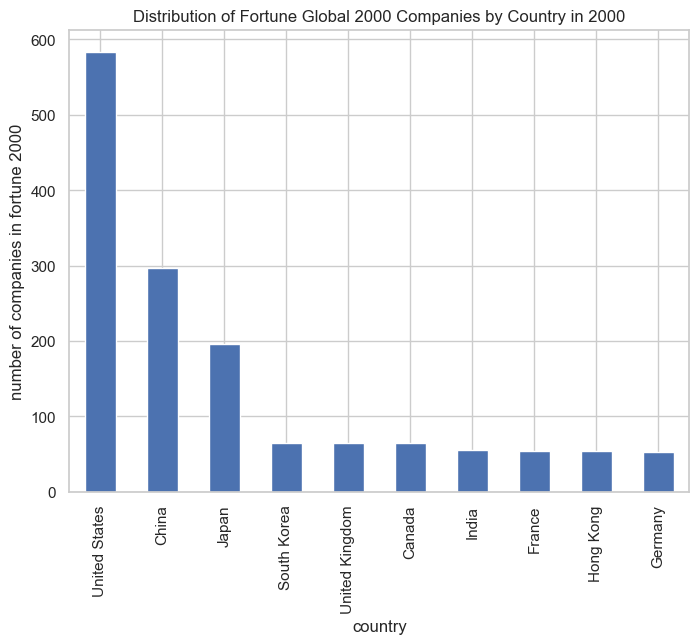

In [101]:
frequencies_by_country = data["Country"][data["Year"] == 2022].value_counts().head(10)

plt.figure(figsize=(8,6))
frequencies_by_country.plot(kind = "bar")
plt.xlabel("country")
plt.ylabel("number of companies in fortune 2000")
plt.title("Distribution of Fortune Global 2000 Companies by Country in 2000")
plt.show()

# extension : display line chart to GDP of the country as a comparison

Over half of the Fortune Global 2000 companies are headquartered in three countries: the United States, China, and Japan.

### Distribution of Fortune 2000 companies over the years


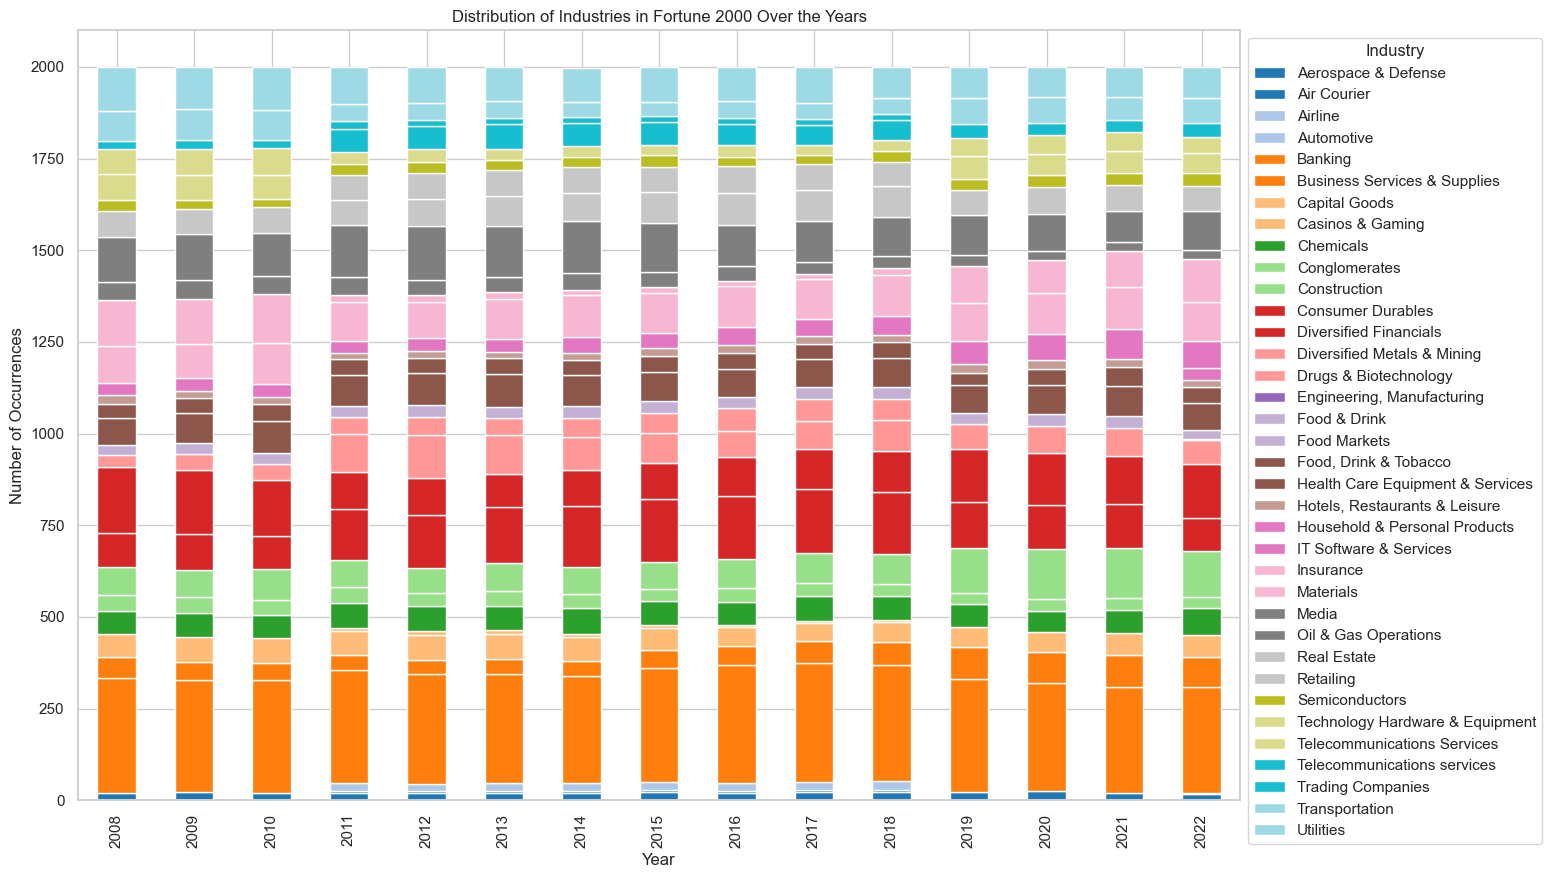

In [102]:
# Group by "Year" and "Industry" and count occurrences
industry_counts_by_year = data.groupby(['Year', 'Industry']).size().unstack().fillna(0)

# Plot the stacked bar chart
# Use a different colormap for better color differentiation
industry_counts_by_year.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')
plt.title("Distribution of Industries in Fortune 2000 Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend(title="Industry", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


There appears to be some fluctuation in the composition of Fortune 2000 companies, with certain industries entering and leaving the list over time. This may be attributed to factors such as shifts in market dynamics, economic conditions, or industry-specific challenges. It's intriguing to see how some industries make periodic appearances on the list.

However, the overall mix of industries has remained relatively consistent over the years.

### Lets see the composition in the first 200 companies in the year 2022

Text(0, 0.5, 'number of industries in fortune 200')

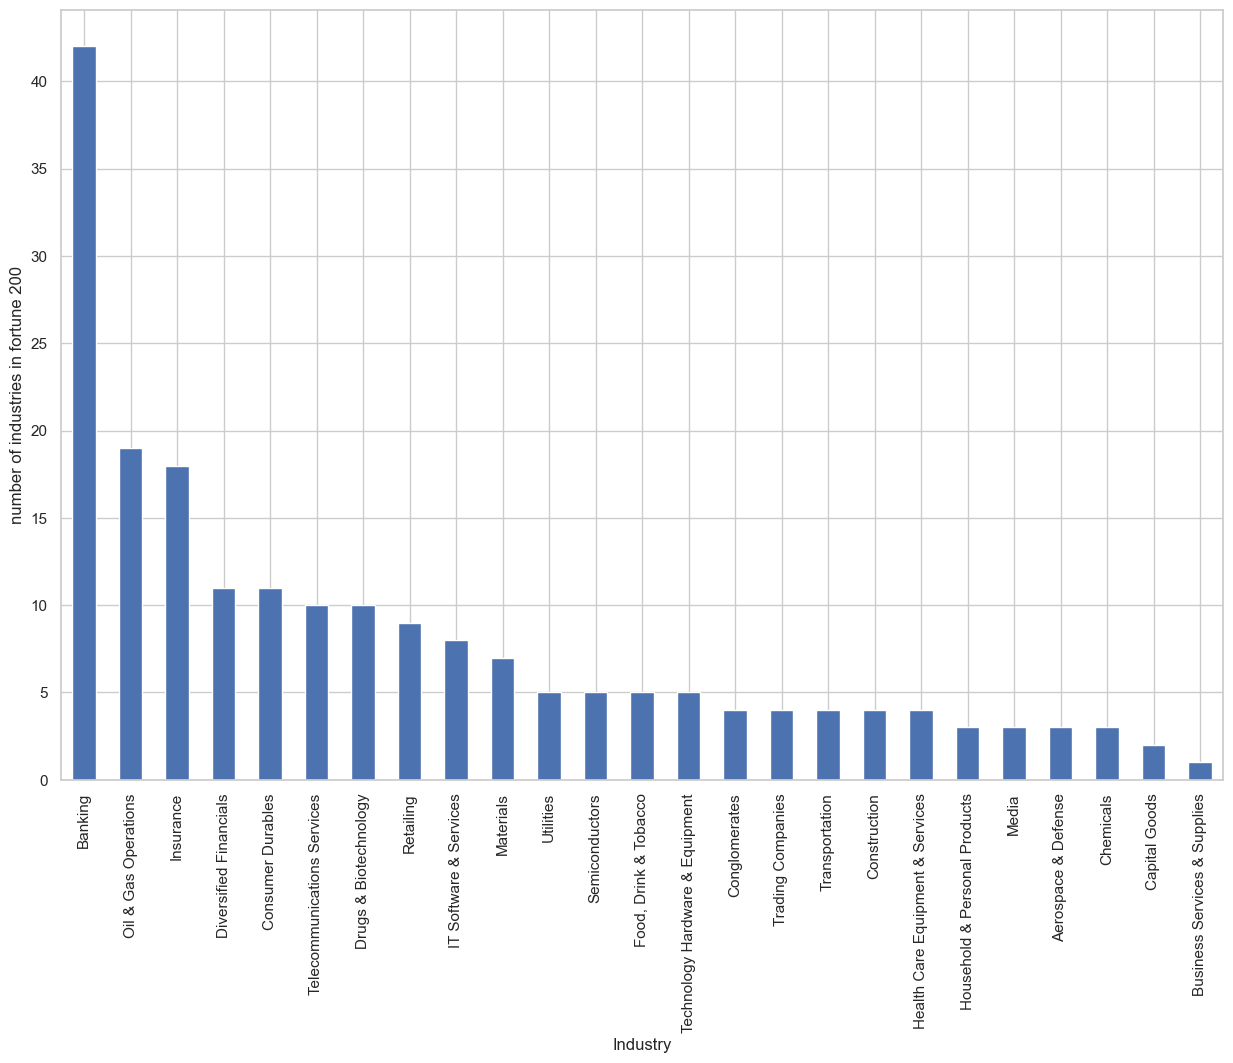

In [103]:
frequencies_by_industry = data["Industry"][data["Year"] == 2022].iloc[:200].value_counts()

plt.figure(figsize=(15,10))
frequencies_by_industry.plot(kind = "bar")
plt.xlabel("Industry")
plt.ylabel("number of industries in fortune 200")

Banking and Oil Gas Operations are the dominating industries.

## Lets see the composition of fortune 2000 companies over years

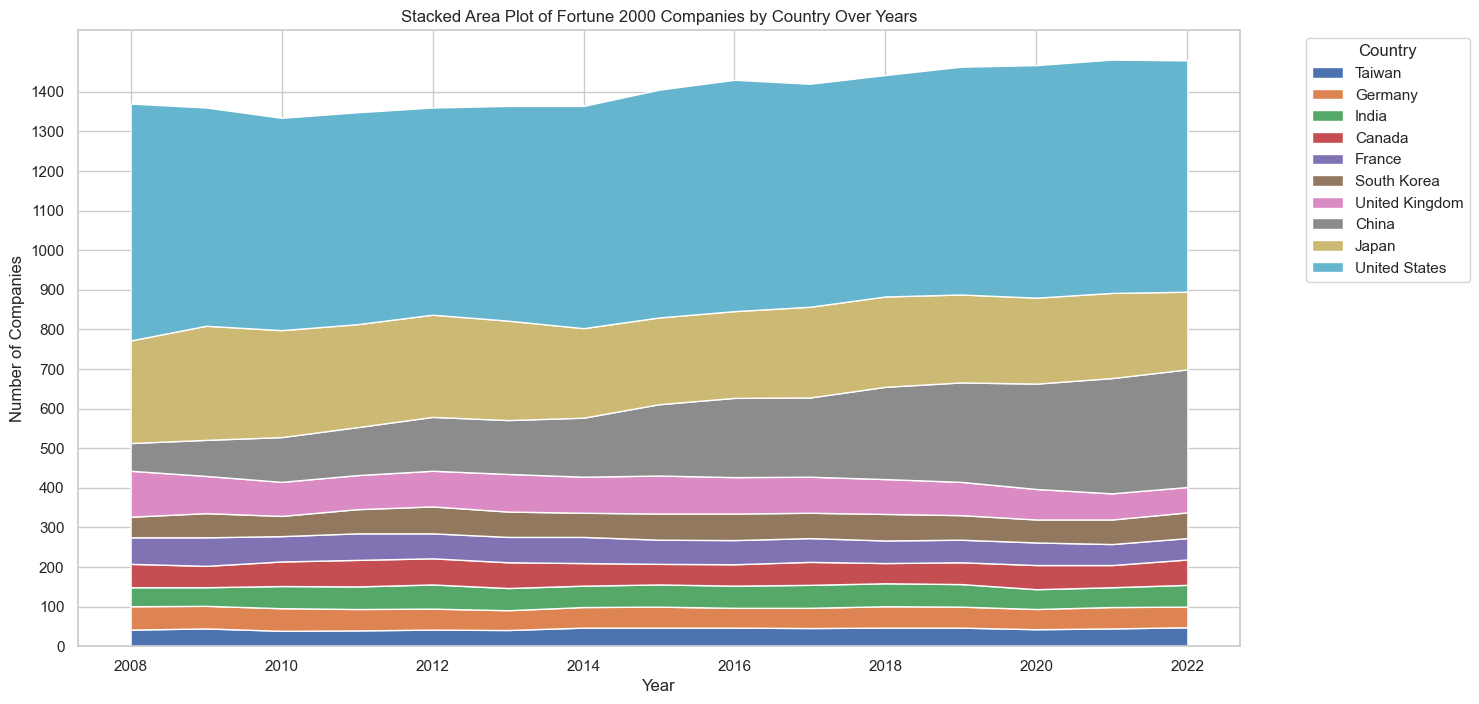

In [104]:

# Group by year and country to get the counts
composition_data = data.groupby(['Year', 'Country']).size().reset_index(name='Count')

# Filter for the top 10 countries
top_countries = composition_data.groupby('Country')['Count'].sum().nlargest(10).index
filtered_data = composition_data[composition_data['Country'].isin(top_countries)]

# Pivot the table for the stacked area plot
pivot_data = filtered_data.pivot_table(index='Year', columns='Country', values='Count', fill_value=0)

# Reverse the order of columns (countries)
pivot_data = pivot_data[top_countries[::-1]]

# Set up the stacked area plot
plt.figure(figsize=(15, 8))
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=top_countries[::-1], cmap='viridis')

plt.yticks(range(0,1500,100))
# Customize the plot
plt.title('Stacked Area Plot of Fortune 2000 Companies by Country Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

The composition of countries remained relatively consistent, but the involvement of Chinese companies saw a dramatic increase, rising from 70 in 2008 to around 300 in 2022. In contrast, the number of Japanese companies decreased from 260 in 2008 to 200 in 2022.

## Visualization 1: Companies with higher rankings on the Forbes 2000 list generally exhibit greater revenue, profits, and assets.

## Line Graph: Sales, Profits, and Assets of the Top 200 Companies in 2022

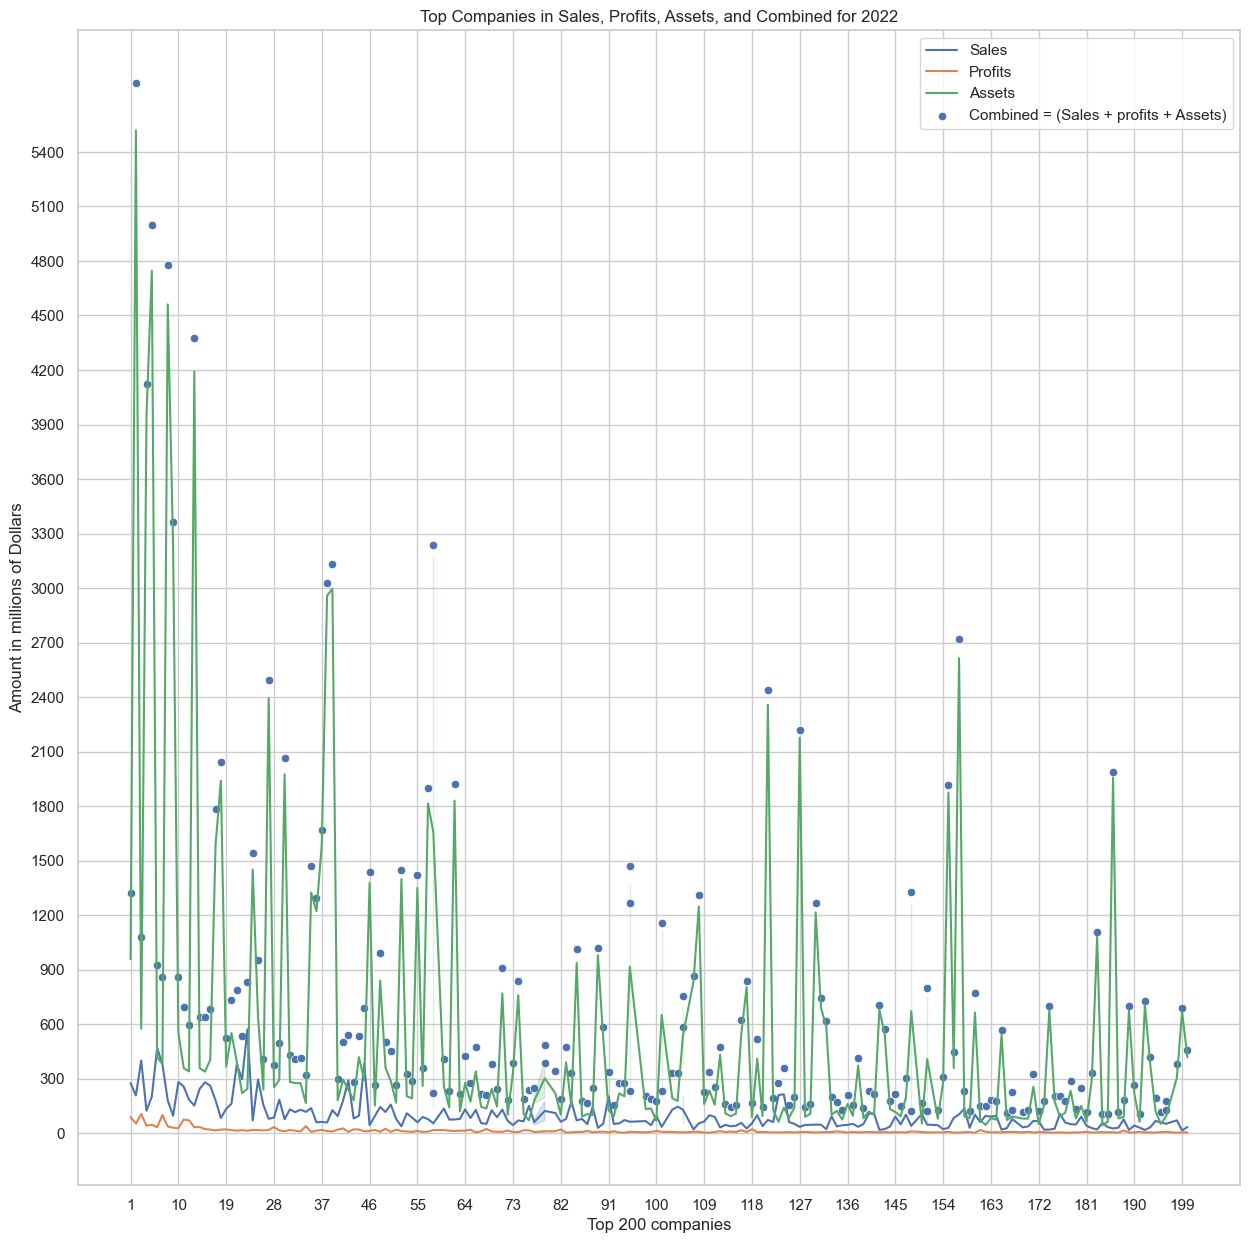

In [105]:
# Filter data for the year 2022
data_2022 = data[data["Year"] == 2022]

# Select the top N companies based on sales
top_companies = data_2022.iloc[:200]

# Calculate the combined value for each company
top_companies["Combined"] = top_companies["Sales"] + top_companies["Profits"] + top_companies["Assets"]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(15, 15))

# Plot individual lines for sales, profits, and assets
sns.lineplot(y=top_companies["Sales"], x=top_companies["Rank_nr"], label="Sales")
sns.lineplot(y=top_companies["Profits"], x=top_companies["Rank_nr"], label="Profits")
sns.lineplot(y=top_companies["Assets"], x=top_companies["Rank_nr"], label="Assets")

# Plot the combined line with a star marker
sns.scatterplot(y=top_companies["Combined"], x=top_companies["Rank_nr"], label="Combined = (Sales + profits + Assets)", marker='o')

plt.yticks(range(0, int(data_2022["Assets"].max()) + 1, 300))
plt.xticks(range(1, 201, 9))

# Customize the plot
plt.title("Top Companies in Sales, Profits, Assets, and Combined for 2022")
plt.xlabel("Top 200 companies")
plt.ylabel("Amount in millions of Dollars")
plt.legend()
plt.grid(True)
plt.show()

- Companies ranked below the top 30 show an interesting trend, where some do not have higher revenue, profits, or assets than those ranked below them. This implies that Forbes may use additional criteria beyond traditional financial metrics to determine rankings. Other qualitative factors or considerations could be influencing the placement of these companies within the top 30.

## Visualization 2: Older companies tend to achieve higher rankings on the Forbes 2000 list.

## Regression Plot: Analysis of the Relationship between Founded Year and Rank for Fortune Global 2000 Companies in 2022

Examining the potential correlation between the founded date and the rank of Fortune Global 2000 companies in the year 2022 using a regression plot.


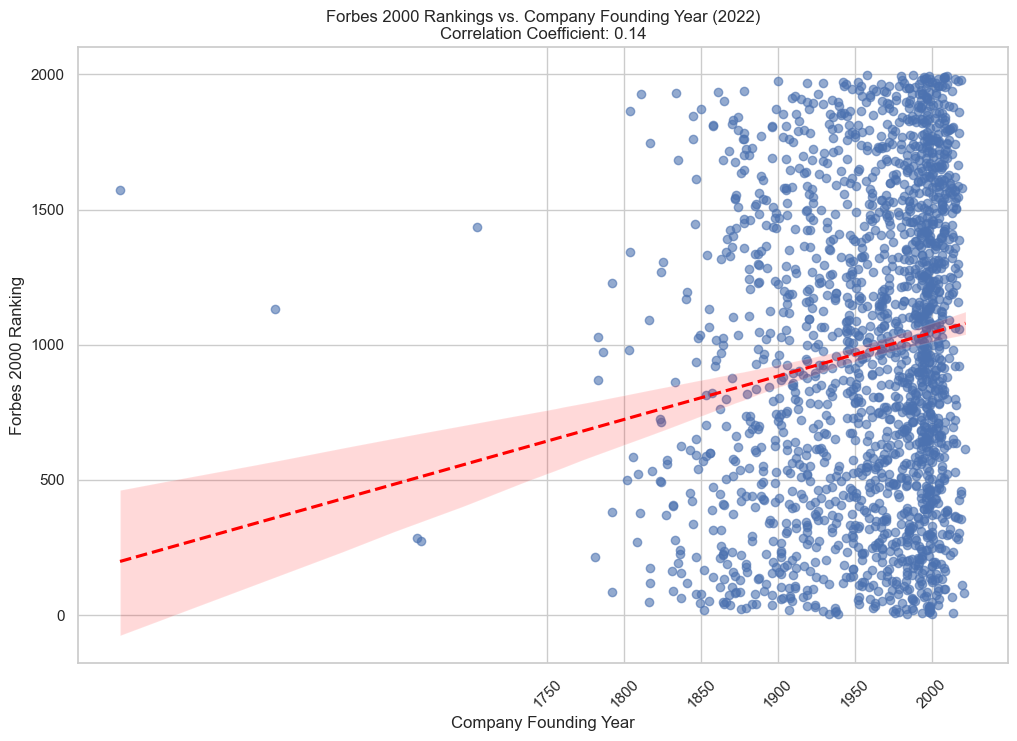

Correlation Coefficient: 0.14


In [106]:
# Filter data for the year 2022 and exclude companies with founding year 0
data_2022 = data[(data['Year'] == 2022) & (data['Year Founded'] > 0)]

# Set up a regplot
plt.figure(figsize=(12, 8))
sns.regplot(x='Year Founded', y='Rank_nr', data=data_2022, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'linestyle':'--'})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(data_2022['Year Founded'], data_2022['Rank_nr'])

# Customize the plot
plt.title(f'Forbes 2000 Rankings vs. Company Founding Year (2022)\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Company Founding Year')
plt.ylabel('Forbes 2000 Ranking')
plt.xticks(range(1750, 2023, 50), rotation=45)  # Set x-axis ticks from 1750 to 2022 with a gap of 50
plt.grid(True)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

- The correlation coefficient between the rank and founding date of Fortune Global 2000 companies in 2022 is 0.14, indicating a weak positive correlation. This suggests a mild tendency for companies with earlier founding dates to achieve higher ranks, although the relationship is not strong.



## Visualization 3: The profit growth of oil and gas companies has slowed over time, likely due to increasing public concern over fossil fuel consumption.


## Profits Analysis: Top 10 Industries Over 10 Years

Visualizing the profits of the top 10 industries over the span of 10 years provides insights into the trends and performances of these sectors. The graph illustrates the fluctuations and relative standings of the industries in terms of profits from 2013 to 2022.

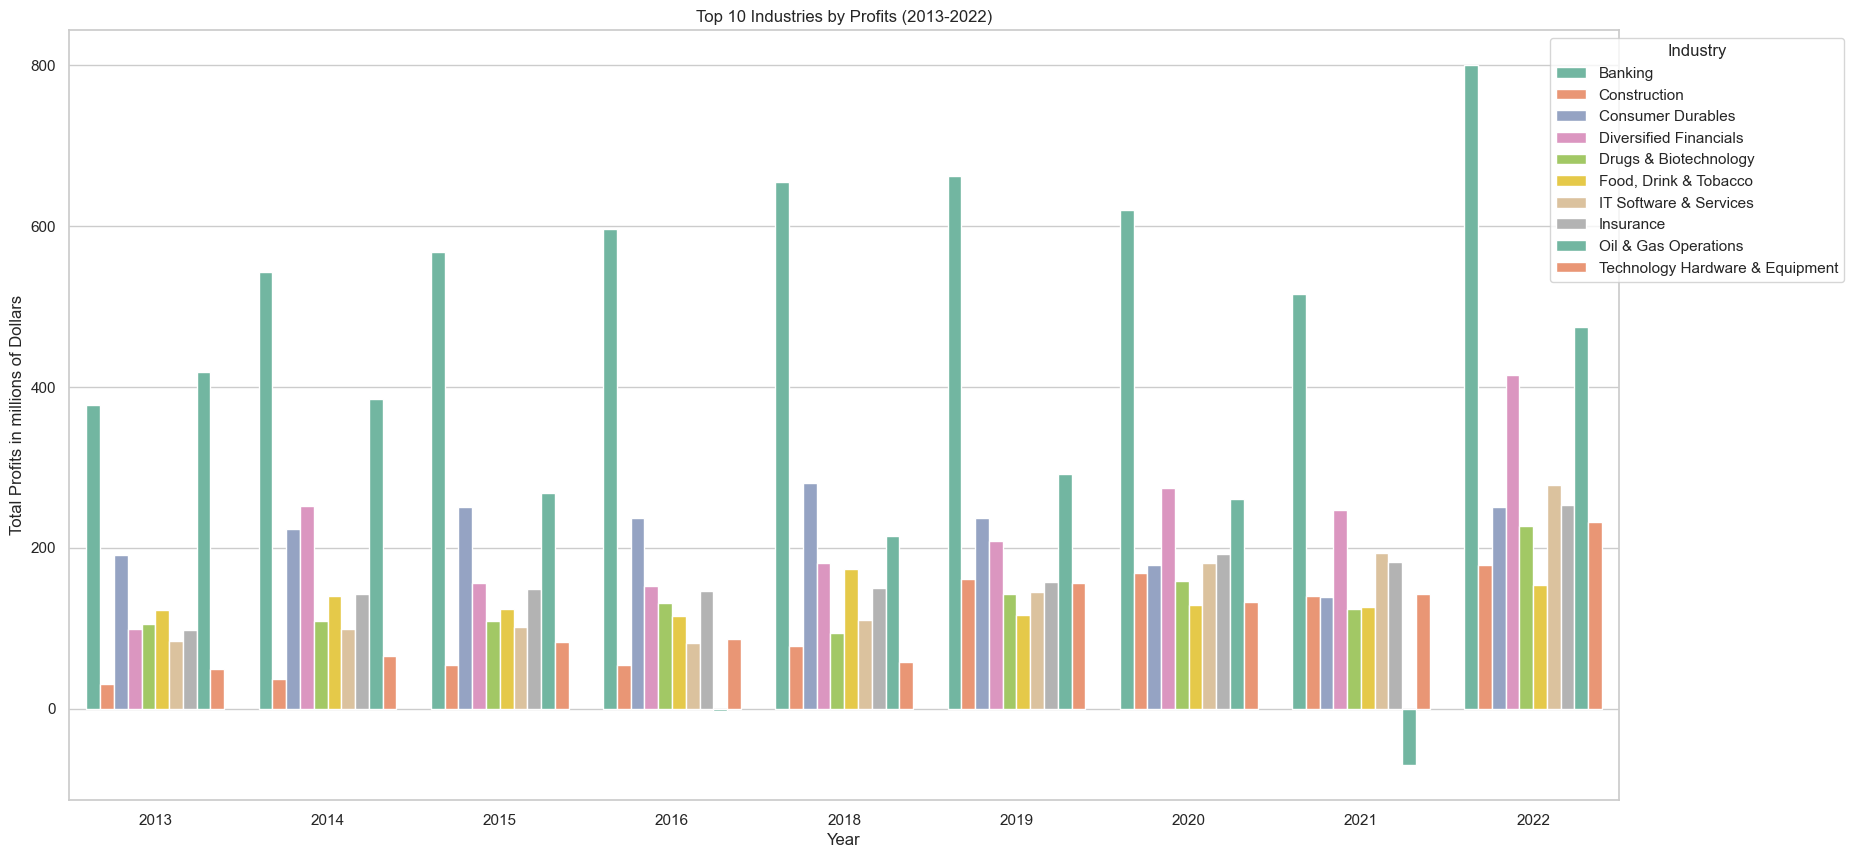

In [107]:

# Filter data for the relevant years
relevant_years = [2013, 2014, 2015, 2016, 1017, 2018, 2019, 2020, 2021, 2022]
data_relevant_years = data[data['Year'].isin(relevant_years)]

# Group by 'Industry' and sum the profits for each industry
industry_profits = data_relevant_years.groupby(['Industry', 'Year'])['Profits'].sum().reset_index()

# Get the top 10 industries based on total profits across all years
top_10_industries = industry_profits.groupby('Industry')['Profits'].sum().nlargest(10).index

# Filter the data for the top 10 industries
top_10_data = industry_profits[industry_profits['Industry'].isin(top_10_industries)]

# Set up a bar plot with a custom color palette
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Profits', hue='Industry', data=top_10_data, palette='Set2')  # Change 'Set2' to any other Seaborn palette

# Customize the plot
plt.title('Top 10 Industries by Profits (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Total Profits in millions of Dollars')
plt.legend(title='Industry', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## Visualization 4: The Forbes 2000 list shows a clear and significant rise in the representation and ranking of technology companies, driven by technological advancements and innovations, especially from 2010 onward.

## Ranking Trends: IT Software & Services Sector (2008-2022)

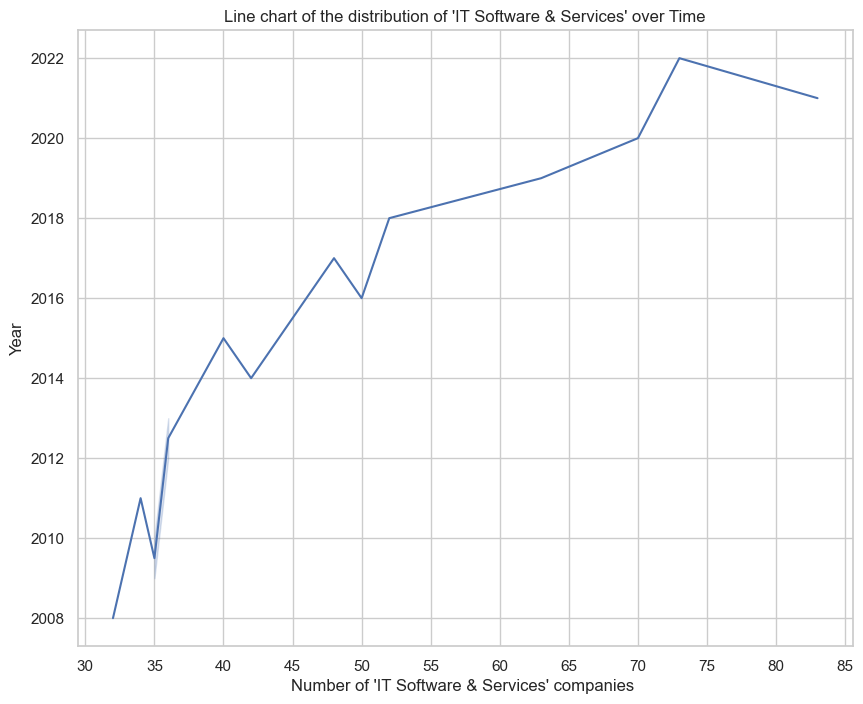

In [108]:
industry_data = data[data['Industry'] == 'IT Software & Services'].groupby('Year').size().reset_index(name='Count')

plt.figure(figsize=(10,8))
sns.lineplot(data = industry_data, x = "Count", y = "Year")
plt.xticks(range(30, 90, 5))
plt.xlabel("Number of 'IT Software & Services' companies ")
plt.title("Line chart of the distribution of 'IT Software & Services' over Time")
plt.show()

- The number of companies in the IT Software & Services sector on the Fortune 2000 list experienced a remarkable increase, rising by over 147 percent from 2008 to 2022. This notable growth highlights a strong expansion trend within the industry.
